In [1]:
import geopandas
import geoplot
import geoplot.crs as gcrs
import numpy as np

from pyproj import Transformer # for coordinate transformation

In [2]:
path = geopandas.datasets.get_path('naturalearth_lowres')
df = geopandas.read_file(path)
# Add a column we'll use later
df['gdp_pp'] = df['gdp_md_est'] / df['pop_est']

C:\Users\Charlie\AppData\Local\Temp\ipykernel_14116\596339426.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  path = geopandas.datasets.get_path('naturalearth_lowres')


<GeoAxes: >

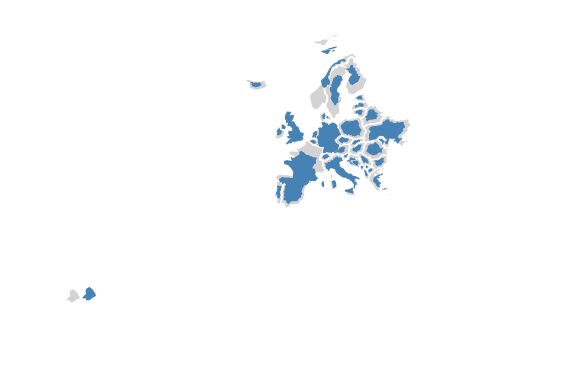

In [3]:
europe = df[(df['continent'] == 'Europe') & (df['name'] != 'Russia')]

ax = geoplot.cartogram(europe,
                  scale='pop_est', limits=(0.5, 1), figsize=(7, 8),
                  projection=gcrs.AlbersEqualArea(),
                  )
geoplot.polyplot(europe, facecolor='lightgray', edgecolor='white', ax=ax)

C:\Users\Charlie\AppData\Local\Temp\ipykernel_14116\3218863589.py:27: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  europe = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


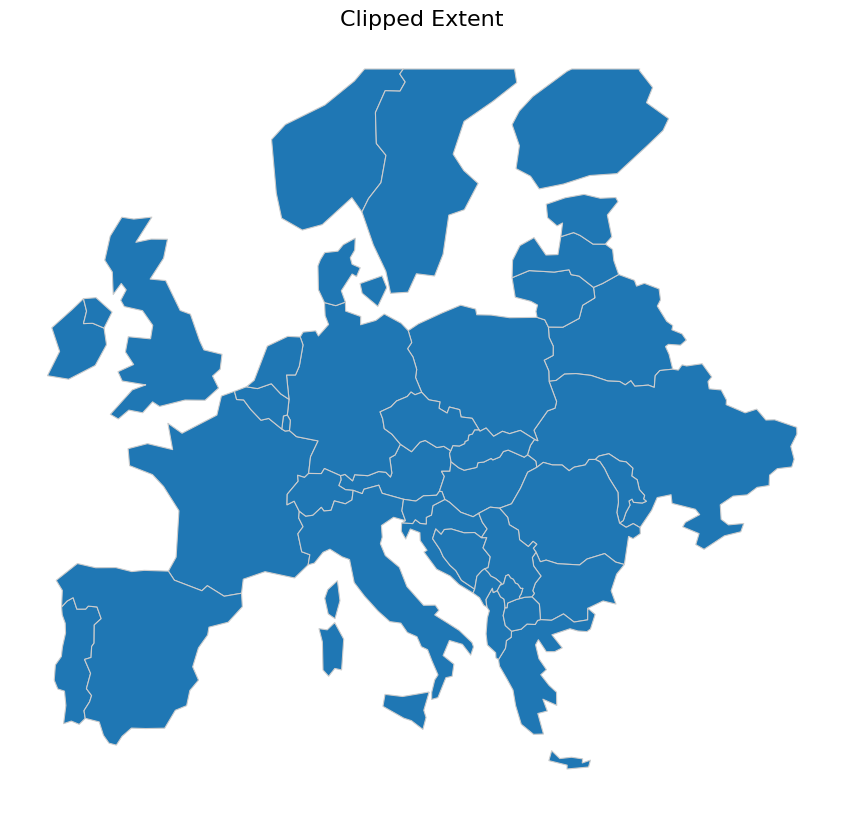

In [4]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Polygon
import matplotlib.pyplot as plt

# STEP 1 #
# Make polygon from bbox coordinates https://stackoverflow.com/a/68741143/18253502
def make_bbox(long0, lat0, long1, lat1):
    return Polygon([[long0, lat0],
                    [long1,lat0],
                    [long1,lat1],
                    [long0, lat1]])

# Coords covering Europe & Russia made with http://bboxfinder.com
bbox = make_bbox(-36.210938,28.304381,197.226563,81.361287)
## Alternatively, can clip to more standard European extent 
## with Central/Eastern Russia excluded
bbox = make_bbox(-36.386719,29.228890,60.292969,74.543330)
bbox = make_bbox(-36.386719,29.228890,60.292969,65)

# STEP 2 #
# Convert to gdf
bbox_gdf = gpd.GeoDataFrame(index=[0], crs='epsg:4326', geometry = [bbox])

# STEP 3 #
# Load europe
europe = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
europe = europe[europe.continent == 'Europe']

# Remove iceland and Russia
europe = europe[(europe.name != 'Iceland')]
europe = europe[(europe.name != 'Russia')]

# Use bbox as clipping border for Europe
europe = europe.overlay(bbox_gdf, how="intersection")

## Now europe has been clipped to the bbox extent:

# plot result
fig, ax = plt.subplots(figsize=(15,10))

europe.plot(linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Clipped Extent', fontsize=16)
ax.set_axis_off()
ax.set_facecolor('#f7f7f7')

plt.show()


In [5]:
europe.loc[1,"geometry"] = europe.loc[1,"geometry"][1]
europe.loc[15,"geometry"] = europe.loc[15,"geometry"][0]
europe.loc[25,"geometry"] = europe.loc[25,"geometry"][0]
europe.loc[26,"geometry"] = europe.loc[26,"geometry"][1]
europe.loc[27,"geometry"] = europe.loc[27,"geometry"][0]

C:\Users\Charlie\AppData\Local\Temp\ipykernel_14116\1156627084.py:1: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  europe.loc[1,"geometry"] = europe.loc[1,"geometry"][1]
C:\Users\Charlie\AppData\Local\Temp\ipykernel_14116\1156627084.py:2: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  europe.loc[15,"geometry"] = europe.loc[15,"geometry"][0]
C:\Users\Charlie\AppData\Local\Temp\ipykernel_14116\1156627084.py:3: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  europe.loc[25,"geometry"] = europe.loc[25,"geometry"][0]
C:\Users\Charlie\AppData

In [6]:
europe

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,5347896.0,Europe,Norway,NOR,403336,"POLYGON ((13.55569 64.78703, 13.91991 64.44542..."
1,67059887.0,Europe,France,FRA,2715518,"POLYGON ((6.65823 49.20196, 8.09928 49.01778, ..."
2,10285453.0,Europe,Sweden,SWE,530883,"POLYGON ((11.46827 59.43239, 12.30037 60.11793..."
3,9466856.0,Europe,Belarus,BLR,63080,"POLYGON ((29.22951 55.91834, 29.37157 55.67009..."
4,44385155.0,Europe,Ukraine,UKR,153781,"POLYGON ((32.41206 52.28869, 32.71576 52.23847..."
5,37970874.0,Europe,Poland,POL,595858,"POLYGON ((23.52754 53.47012, 23.80493 53.08973..."
6,8877067.0,Europe,Austria,AUT,445075,"POLYGON ((16.90375 47.71487, 16.34058 47.71290..."
7,9769949.0,Europe,Hungary,HUN,163469,"POLYGON ((22.64082 48.15024, 22.71053 47.88219..."
8,2657637.0,Europe,Moldova,MDA,11968,"POLYGON ((26.85782 48.36821, 27.52254 48.46712..."
9,19356544.0,Europe,Romania,ROU,250077,"POLYGON ((28.67978 45.30403, 29.14972 45.46493..."


In [7]:
europe["area"] = europe["geometry"].area

europe["centroid"] = europe["geometry"].centroid

C:\Users\Charlie\AppData\Local\Temp\ipykernel_14116\1197353308.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  europe["area"] = europe["geometry"].area
C:\Users\Charlie\AppData\Local\Temp\ipykernel_14116\1197353308.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  europe["centroid"] = europe["geometry"].centroid


In [8]:
# Use pyproj to transform longitude and latitude into web-mercator and add to a copy of the asset dataframe
TRANSFORM_4326_TO_3857 = Transformer.from_crs("EPSG:4326", "EPSG:3857")
TRANSFORM_3857_TO_4326 = Transformer.from_crs("EPSG:3857", "EPSG:4326")

In [9]:
europe["lon"] = europe["centroid"].x
europe["lat"] = europe["centroid"].y

europe["x"],europe["y"]=TRANSFORM_4326_TO_3857.transform(europe["lat"], europe["lon"])

In [10]:
europe["pop_density"] = (europe["pop_est"]/europe["area"])

europe["scale_value"] = (europe["pop_density"]/europe["pop_density"].max())**0.5

<GeoAxes: >

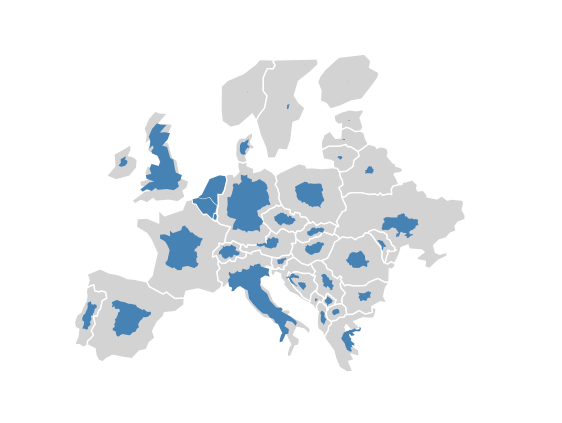

In [11]:
ax = geoplot.cartogram(europe,
                  scale='scale_value', 
                  figsize=(7, 8),
                  limits=(0.0074, 1),
                  projection=gcrs.AlbersEqualArea(),
                  #scale_func=power_scale,
                  )
geoplot.polyplot(europe, facecolor='lightgray', edgecolor='white', ax=ax)

In [12]:
norway = europe.iloc[0]['geometry']

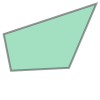

In [13]:
norway.simplify(1)

In [14]:
def poly_scale(poly_orig,scale):

    xx,yy = (poly_orig.exterior.coords.xy)

    xx = np.array(xx)
    yy = np.array(yy)

    xc,yc = poly_orig.centroid.coords.xy

    xx = (xx - xc)*scale + xc
    yy = (yy - yc)*scale + yc

    return Polygon(zip(xx,yy))


In [15]:
def squares(poly):

    side = (poly.area**0.5)

    xx = np.array([-side/2,-side/2,side/2,side/2])
    yy = np.array([-side/2,side/2,side/2,-side/2])

    xc,yc = poly.centroid.coords.xy

    xx = xx + xc
    yy = yy + yc

    return Polygon(zip(xx,yy))

In [16]:
# europe["geometry"] = europe.apply(lambda x: x["geometry"].simplify(0.5), axis=1)

In [17]:
europe["poly_scaled"] = europe.apply(lambda x: poly_scale(x["geometry"], x["scale_value"]), axis=1)
europe["squares"] = europe.apply(lambda x: squares(x["poly_scaled"]), axis=1)
europe["poly_orig"] = europe["geometry"]

In [18]:
europe["area_orig"] = europe["poly_orig"].area
europe["area_scaled"] = europe["poly_scaled"].area

C:\Users\Charlie\AppData\Local\Temp\ipykernel_14116\3425672429.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  europe["area_orig"] = europe["poly_orig"].area


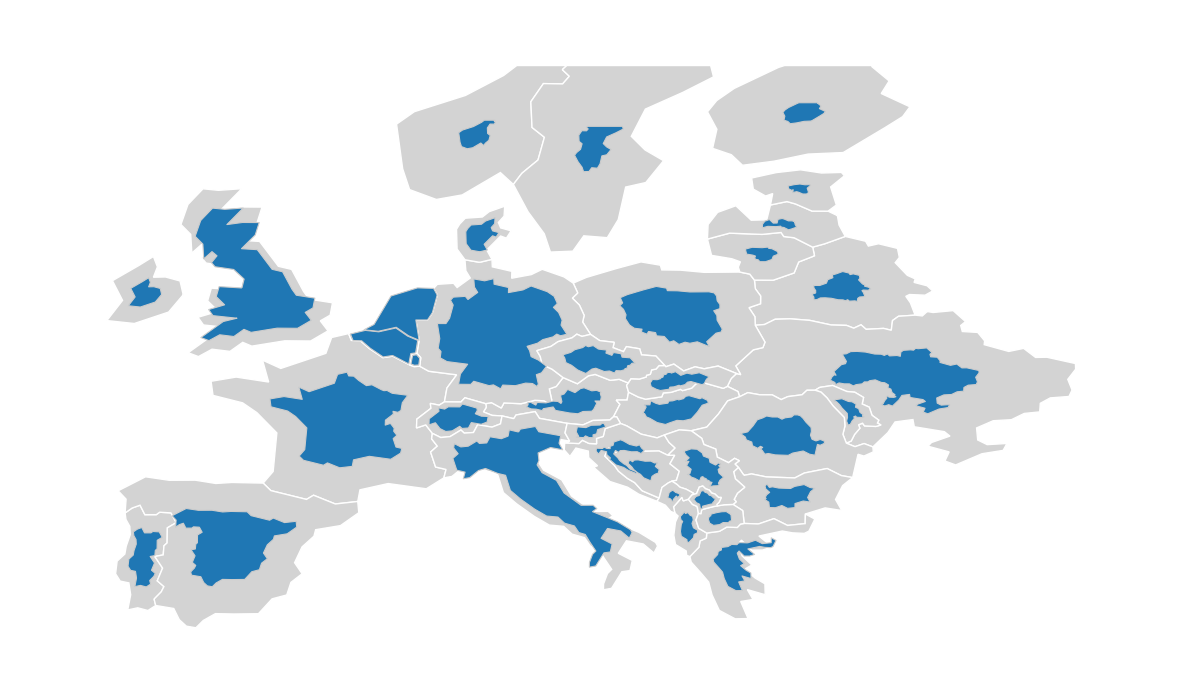

In [19]:
europe["geometry"] = europe["poly_scaled"]

# plot result
fig, ax = plt.subplots(figsize=(15,10))

europe.plot(linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_axis_off()
ax.set_facecolor('#f7f7f7')
ax.set_aspect('equal', adjustable='box')

europe["geometry"] = europe["poly_orig"]
geoplot.polyplot(europe, facecolor='lightgray', edgecolor='white', ax=ax)

plt.show()

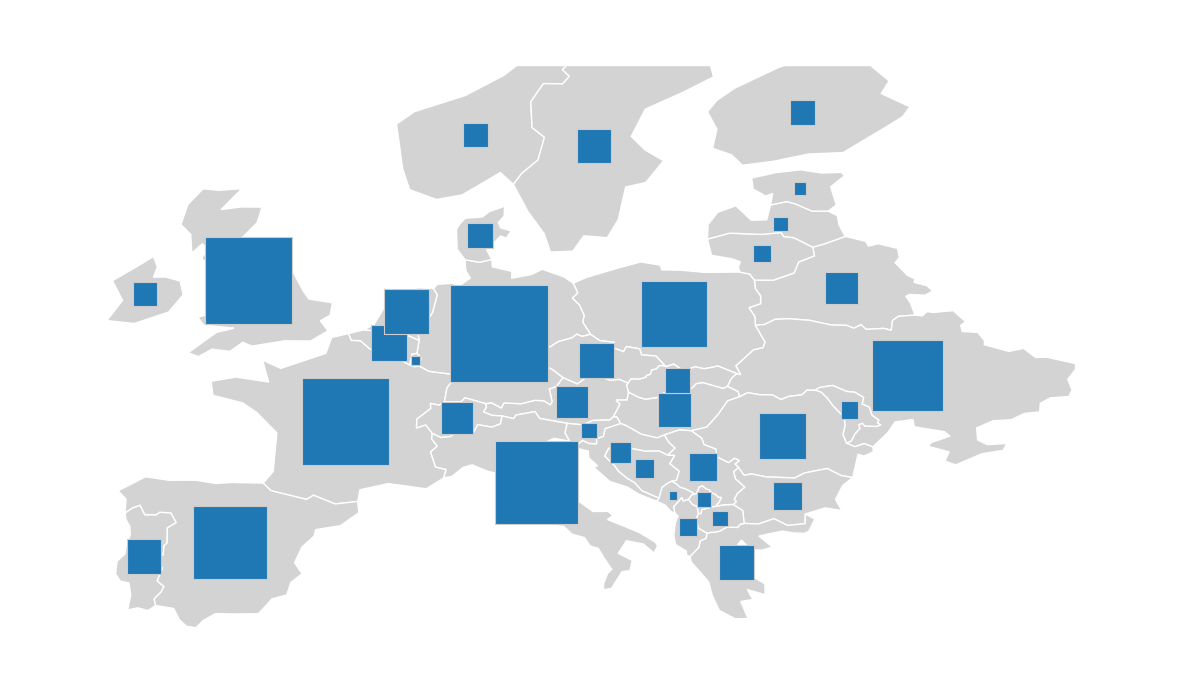

In [20]:
europe["geometry"] = europe["squares"]

# plot result
fig, ax = plt.subplots(figsize=(15,10))

europe.plot(linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_axis_off()
ax.set_facecolor('#f7f7f7')
ax.set_aspect('equal', adjustable='box')

europe["geometry"] = europe["poly_orig"]
geoplot.polyplot(europe, facecolor='lightgray', edgecolor='white', ax=ax)

plt.show()

In [21]:
## Not sure why but the areas don't seem right, could be to do with the projection??

# europe["geometry"] = europe["poly_orig"]

# ax = geoplot.cartogram(europe,
#                   scale='pop_est', limits=(0.01, 1), figsize=(7, 8),
#                   projection=gcrs.AlbersEqualArea(),
#                   )
# geoplot.polyplot(europe, facecolor='lightgray', edgecolor='white', ax=ax)

In [22]:
# import libraries

import pandas as pd # for dataframes
import numpy as np  # for arrays

from pyproj import Transformer # for coordinate transformation

from bokeh.plotting import figure, output_notebook, show, output_file # for plotting map
from bokeh.models import HoverTool
from bokeh.plotting import figure, output_file, show, ColumnDataSource
from bokeh.palettes import Category20, inferno, plasma, viridis
from bokeh.models import WMTSTileSource
from bokeh.models import CategoricalColorMapper, Legend

output_notebook() # to plot to notebook

Loading BokehJS ...

In [23]:
df_europe = pd.DataFrame(europe)

In [24]:
df_centres = df_europe[["name","x","y","lat","lon"]].set_index("name")

In [25]:
df_centres.loc["United Kingdom"]

x     -2.958864e+05
y      7.148097e+06
lat    5.388336e+01
lon   -2.657993e+00
Name: United Kingdom, dtype: float64

In [26]:
df_europe[df_europe["name"]=="United Kingdom"]["x"]

27   -295886.424997
Name: x, dtype: float64

In [27]:
df_europe["size"] = 5*(df_europe["pop_est"]/df_europe["pop_est"].min())**0.5

In [28]:
df_europe = df_europe[["name","x","y","lat","lon","size"]]

In [29]:
# # create map plot

# # See https://wiki.openstreetmap.org/wiki/Tile_servers for various tile services
# MAP_TILES = {"OpenMap": WMTSTileSource(url="http://c.tile.openstreetmap.org/{Z}/{X}/{Y}.png"),
#          "ESRI": WMTSTileSource(url="https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{Z}/{Y}/{X}.jpg"),
#          "OpenTopoMap": WMTSTileSource(url="https://tile.opentopomap.org/{Z}/{X}/{Y}.png")}

# tile_map = 'ESRI'

# tools='pan,zoom_in,zoom_out,wheel_zoom,reset,save'

# p = figure(tools=tools, 
#         width=800, 
#         height=800,
#         #sizing_mode="scale_both",
#         x_axis_label="longitude",
#         y_axis_label="latitude",
#         match_aspect=True,
#         x_axis_type="mercator",
#         y_axis_type="mercator")

# p.add_tile(MAP_TILES[tile_map])

# p.add_layout(Legend(), 'right') # neat trick to make the legend appear outside the plot (https://discourse.bokeh.org/t/adding-a-legend-outside-the-plot-area-is-possible-even-with-auto-grouped-indirectly-created-legends/5595)
    
# source_wind = ColumnDataSource(df_europe)
    
# render_wind = p.scatter('x', 'y',
#         size="size", 
#         alpha=0.9, 
#         marker="square",
#         fill_color="cyan", 
#         line_color="black",
#         fill_alpha=0.3, 
#         line_width=1, 
#         legend_label='wind',
#         hatch_pattern="",
#         source=source_wind)

# # add custom hover tool
# hover_wind = HoverTool(renderers=[render_wind])
# hover_wind.tooltips = [("Country","@name"),
#                        ]
# p.add_tools(hover_wind)


# for country in ["France","Netherlands","Norway","Belgium","Ireland","Denmark"]:
#         render_transfer = p.line([df_centres.loc["United Kingdom"].x,df_centres.loc[country].x],
#                                 [df_centres.loc["United Kingdom"].y,df_centres.loc[country].y],
#                                 color="red",
#                                 width=5)


# p.legend.click_policy="hide"



In [30]:
# create map plot

# See https://wiki.openstreetmap.org/wiki/Tile_servers for various tile services
MAP_TILES = {"OpenMap": WMTSTileSource(url="http://c.tile.openstreetmap.org/{Z}/{X}/{Y}.png"),
         "ESRI": WMTSTileSource(url="https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{Z}/{Y}/{X}.jpg"),
         "OpenTopoMap": WMTSTileSource(url="https://tile.opentopomap.org/{Z}/{X}/{Y}.png")}

tile_map = 'ESRI'

tools='pan,zoom_in,zoom_out,wheel_zoom,reset,save'

p = figure(tools=tools, 
        width=800, 
        height=800,
        #sizing_mode="scale_both",
        x_axis_label="longitude",
        y_axis_label="latitude",
        match_aspect=True,
        x_axis_type="mercator",
        y_axis_type="mercator")

p.add_tile(MAP_TILES[tile_map])

p.add_layout(Legend(), 'right') # neat trick to make the legend appear outside the plot (https://discourse.bokeh.org/t/adding-a-legend-outside-the-plot-area-is-possible-even-with-auto-grouped-indirectly-created-legends/5595)
    
source_wind = ColumnDataSource(df_europe)
    
render_wind = p.wedge('x', 'y',
        radius="size",
        radius_units = "screen",
        start_angle=0, 
        end_angle=3.8,
        alpha=0.9, 
        fill_color="green", 
        line_color="black",
        fill_alpha=0.3, 
        line_width=1, 
        legend_label='renewable',
        source=source_wind)

render_nuclear = p.wedge('x', 'y',
        radius="size",
        radius_units = "screen",
        start_angle=3.8, 
        end_angle=4.8,
        alpha=0.9, 
        fill_color="red", 
        line_color="black",
        fill_alpha=0.3, 
        line_width=1, 
        legend_label='nuclear',
        source=source_wind)

render_fossil = p.wedge('x', 'y',
        radius="size",
        radius_units = "screen",
        start_angle=4.8, 
        end_angle=0,
        alpha=0.9, 
        fill_color="black", 
        line_color="black",
        fill_alpha=0.3, 
        line_width=1, 
        legend_label='fossil fuels',
        source=source_wind)

# add custom hover tool
hover_wind = HoverTool(renderers=[render_wind,render_nuclear,render_fossil])
hover_wind.tooltips = [("Country","@name"),
                       ]
p.add_tools(hover_wind)


for country in ["France","Netherlands","Norway","Belgium","Ireland","Denmark"]:
        render_transfer = p.line([df_centres.loc["United Kingdom"].x,df_centres.loc[country].x],
                                [df_centres.loc["United Kingdom"].y,df_centres.loc[country].y],
                                color="red",
                                width=5)


p.legend.click_policy="hide"



In [31]:
# show the plot
# output_file(filename="Map28-MapChart-EuropeElectric.html",title="EuropeElectric")

In [32]:
show(p)

In [33]:
# Data source: https://www.energy-charts.info/charts/import_export/chart.htm?l=en&c=DE&year=2023&flow=physical_flows_all

cross_border_flow = pd.read_csv("CrossBorderFlows.csv",delimiter=",")

cross_border_flow[['Flow', 'Units']] = cross_border_flow["Flow"].str.split(' ', n=1, expand=True)

cross_border_flow["Multiplier"] = cross_border_flow["Units"].replace("TWh",1000).replace("GWh",1)

cross_border_flow["Flow"] = cross_border_flow["Flow"].astype(float)

cross_border_flow["Flow_GWh"] = cross_border_flow["Flow"]*cross_border_flow["Multiplier"]

cross_border_flow = cross_border_flow[["Export Country","Import Country","Flow_GWh"]]


In [34]:
cross_border_flow["Flow_reverse"] = 0
for cnt,row in cross_border_flow.iterrows():
    try:
        cross_border_flow["Flow_reverse"].iloc[cnt] = cross_border_flow[(cross_border_flow["Import Country"]==row["Export Country"]) & (cross_border_flow["Export Country"]==row["Import Country"])]["Flow_GWh"]
    except:
        print(row)

Export Country    Ukraine
Import Country     Russia
Flow_GWh              0.0
Flow_reverse            0
Name: 0, dtype: object


C:\Users\Charlie\AppData\Local\Temp\ipykernel_14116\2397520458.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cross_border_flow["Flow_reverse"].iloc[cnt] = cross_border_flow[(cross_border_flow["Import Country"]==row["Export Country"]) & (cross_border_flow["Export Country"]==row["Import Country"])]["Flow_GWh"]
C:\Users\Charlie\AppData\Local\Temp\ipykernel_14116\2397520458.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cross_border_flow["Flow_reverse"].iloc[cnt] = cross_border_flow[(cross_border_flow["Import Country"]==row["Export Country"]) & (cross_border_flow["Export Country"]==row["Import Country"])]["Flow_

In [35]:
cross_border_flow["Total transfers"] = cross_border_flow["Flow_GWh"]+cross_border_flow["Flow_reverse"]

cross_border_flow["Size"] = 10*cross_border_flow["Total transfers"]/cross_border_flow["Total transfers"].max()

In [36]:
cross_border_flow

,Export Country,Import Country,Flow_GWh,Flow_reverse,Total transfers,Size
0,Ukraine,Russia,0.0,0,0.0,0.000000
1,Denmark,United Kingdom,61.0,9,70.0,0.034067
2,United Kingdom,Denmark,9.0,61,70.0,0.034067
3,Lithuania,Russia,64.0,61,125.0,0.060833
4,Russia,Lithuania,61.0,64,125.0,0.060833
...,...,...,...,...,...,...
178,Italy,France,27.0,17800,17827.0,8.675784
179,France,United Kingdom,15700.0,2600,18300.0,8.905976
180,United Kingdom,France,2600.0,15700,18300.0,8.905976
181,Switzerland,Italy,20400.0,148,20548.0,10.000000


In [37]:
electric_gen = pd.read_csv("yearly_full_release_long_format.csv")

In [38]:
df_plot = df_europe.merge(electric_gen, left_on='name', right_on='Country', how="left")

In [39]:
df_plot["size"] = 2.5*(df_plot["Total"]/df_plot["Total"].min())**0.5

In [40]:
cross_border_flow

,Export Country,Import Country,Flow_GWh,Flow_reverse,Total transfers,Size
0,Ukraine,Russia,0.0,0,0.0,0.000000
1,Denmark,United Kingdom,61.0,9,70.0,0.034067
2,United Kingdom,Denmark,9.0,61,70.0,0.034067
3,Lithuania,Russia,64.0,61,125.0,0.060833
4,Russia,Lithuania,61.0,64,125.0,0.060833
...,...,...,...,...,...,...
178,Italy,France,27.0,17800,17827.0,8.675784
179,France,United Kingdom,15700.0,2600,18300.0,8.905976
180,United Kingdom,France,2600.0,15700,18300.0,8.905976
181,Switzerland,Italy,20400.0,148,20548.0,10.000000


In [41]:
df_plot["Renewables_PC"] = df_plot["Renewables"]/df_plot["Total"]
df_plot["Nuclear_PC"] = df_plot["Nuclear"]/df_plot["Total"]
df_plot["Fossil_PC"] = df_plot["Fossil"]/df_plot["Total"]

df_plot["RenewableWedgeEnd"] = 2*np.pi*df_plot["Renewables"]/df_plot["Total"]
df_plot["NuclearWedgeEnd"] = 2*np.pi*(df_plot["Renewables"]+df_plot["Nuclear"])/df_plot["Total"]

In [42]:
# create map plot

# See https://wiki.openstreetmap.org/wiki/Tile_servers for various tile services
MAP_TILES = {"OpenMap": WMTSTileSource(url="http://c.tile.openstreetmap.org/{Z}/{X}/{Y}.png"),
         "ESRI": WMTSTileSource(url="https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{Z}/{Y}/{X}.jpg"),
         "OpenTopoMap": WMTSTileSource(url="https://tile.opentopomap.org/{Z}/{X}/{Y}.png"),
         "OpenMapFR": WMTSTileSource(url="https://a.tile.openstreetmap.fr/hot/{z}/{x}/{y}.png "),
         }


tile_map = 'OpenMap'

tools='pan,zoom_in,zoom_out,wheel_zoom,reset,save'

p = figure(tools=tools, 
        width=1000, 
        height=800,
        #sizing_mode="scale_both",
        x_axis_label="longitude",
        y_axis_label="latitude",
        match_aspect=True,
        x_axis_type="mercator",
        y_axis_type="mercator")

p.add_tile(MAP_TILES[tile_map])

p.add_layout(Legend(), 'right') # neat trick to make the legend appear outside the plot (https://discourse.bokeh.org/t/adding-a-legend-outside-the-plot-area-is-possible-even-with-auto-grouped-indirectly-created-legends/5595)
    

for cnt,row in cross_border_flow.iterrows():
        try:
                if cnt==180:
                        render_transfer = p.line([df_centres.loc[row["Export Country"]].x,df_centres.loc[row["Import Country"]].x],
                                                [df_centres.loc[row["Export Country"]].y,df_centres.loc[row["Import Country"]].y],
                                                color="blue",
                                                alpha=0.9,
                                                width=row["Size"],
                                                legend_label='Cross border flows')
                else:
                        render_transfer = p.line([df_centres.loc[row["Export Country"]].x,df_centres.loc[row["Import Country"]].x],
                                        [df_centres.loc[row["Export Country"]].y,df_centres.loc[row["Import Country"]].y],
                                        color="blue",
                                        alpha=0.9,
                                        width=row["Size"])
        except:
                print(row)
                
                    
source_wind = ColumnDataSource(df_plot)
    
render_renewable = p.wedge('x', 'y',
        radius="size",
        radius_units = "screen",
        start_angle=0, 
        end_angle="RenewableWedgeEnd",
        alpha=0.9, 
        fill_color="green", 
        line_color="black",
        fill_alpha=0.8, 
        line_width=1, 
        legend_label='renewable',
        source=source_wind)

render_nuclear = p.wedge('x', 'y',
        radius="size",
        radius_units = "screen",
        start_angle="RenewableWedgeEnd", 
        end_angle="NuclearWedgeEnd",
        alpha=0.9, 
        fill_color="red", 
        line_color="black",
        fill_alpha=0.8, 
        line_width=1, 
        legend_label='nuclear',
        source=source_wind)

render_fossil = p.wedge('x', 'y',
        radius="size",
        radius_units = "screen",
        start_angle="NuclearWedgeEnd", 
        end_angle=0,
        alpha=0.9, 
        fill_color="black", 
        line_color="black",
        fill_alpha=0.8, 
        line_width=1, 
        legend_label='fossil fuels',
        source=source_wind)

# add custom hover tool
hover_wind = HoverTool(renderers=[render_renewable,render_nuclear,render_fossil])
hover_wind.tooltips = [("Country","@name"),
                       ("Total TWh","@Total{01.1f}"),
                       ("Renewables","@Renewables_PC{%01.1f}"),
                       ("Nuclear","@Nuclear_PC{%01.1f}"),
                       ("Fossil Fuels","@Fossil_PC{%01.1f}"),
                       ]

p.add_tools(hover_wind)

# p.legend.click_policy="hide"



Export Country     Ukraine
Import Country      Russia
Flow_GWh               0.0
Flow_reverse             0
Total transfers        0.0
Size                   0.0
Name: 0, dtype: object
Export Country     Lithuania
Import Country        Russia
Flow_GWh                64.0
Flow_reverse              61
Total transfers        125.0
Size                0.060833
Name: 3, dtype: object
Export Country        Russia
Import Country     Lithuania
Flow_GWh                61.0
Flow_reverse              64
Total transfers        125.0
Size                0.060833
Name: 4, dtype: object
Export Country      Armenia
Import Country      Georgia
Flow_GWh              142.0
Flow_reverse             78
Total transfers       220.0
Size               0.107066
Name: 5, dtype: object
Export Country      Georgia
Import Country      Armenia
Flow_GWh               78.0
Flow_reverse            142
Total transfers       220.0
Size               0.107066
Name: 6, dtype: object
Export Country        Italy
Import Coun

In [43]:
output_file(filename="Map28-MapChart-EuropeElectric.html",title="EuropeElectric")

In [44]:
show(p)

In [45]:
background_x = []
background_y = []

for cnt,row in europe.iterrows():
    xx,yy = list(row["geometry"].exterior.coords.xy)
    background_x.append(xx)
    background_y.append(yy)

In [46]:
# create map plot

tools='pan,zoom_in,zoom_out,wheel_zoom,reset,save'

p = figure(tools=tools, 
        width=1200, 
        height=800,
        #sizing_mode="scale_both",
        x_axis_label="longitude",
        y_axis_label="latitude",
        match_aspect=True)

p.add_layout(Legend(), 'right') # neat trick to make the legend appear outside the plot (https://discourse.bokeh.org/t/adding-a-legend-outside-the-plot-area-is-possible-even-with-auto-grouped-indirectly-created-legends/5595)
      
p.patches('x', 'y', source = ColumnDataSource(dict(x = background_x, y = background_y)), fill_color="lightgrey", line_color = "white", line_width = 2)

for cnt,row in cross_border_flow.iterrows():
        try:
                if cnt==180:
                        render_transfer = p.line([df_centres.loc[row["Export Country"]].lon,df_centres.loc[row["Import Country"]].lon],
                                                [df_centres.loc[row["Export Country"]].lat,df_centres.loc[row["Import Country"]].lat],
                                                color="blue",
                                                alpha=0.9,
                                                width=row["Size"],
                                                legend_label='Cross border flows')
                else:
                        render_transfer = p.line([df_centres.loc[row["Export Country"]].lon,df_centres.loc[row["Import Country"]].lon],
                                        [df_centres.loc[row["Export Country"]].lat,df_centres.loc[row["Import Country"]].lat],
                                        color="blue",
                                        alpha=0.9,
                                        width=row["Size"])
        except:
                print(row)
                
                    
source_wind = ColumnDataSource(df_plot)

alpha = 0.8
render_renewable = p.wedge('lon', 'lat',
        radius="size",
        radius_units = "screen",
        start_angle=0, 
        end_angle="RenewableWedgeEnd",
        alpha=0.9, 
        fill_color="green", 
        line_color="black",
        fill_alpha=alpha, 
        line_width=1, 
        legend_label='renewable',
        source=source_wind)

render_nuclear = p.wedge('lon', 'lat',
        radius="size",
        radius_units = "screen",
        start_angle="RenewableWedgeEnd", 
        end_angle="NuclearWedgeEnd",
        alpha=0.9, 
        fill_color="red", 
        line_color="black",
        fill_alpha=alpha, 
        line_width=1, 
        legend_label='nuclear',
        source=source_wind)

render_fossil = p.wedge('lon', 'lat',
        radius="size",
        radius_units = "screen",
        start_angle="NuclearWedgeEnd", 
        end_angle=0,
        alpha=0.9, 
        fill_color="black", 
        line_color="black",
        fill_alpha=alpha, 
        line_width=1, 
        legend_label='fossil fuels',
        source=source_wind)

# add custom hover tool
hover_wind = HoverTool(renderers=[render_renewable,render_nuclear,render_fossil])
hover_wind.tooltips = [("Country","@name"),
                       ("Total TWh","@Total{01.1f}"),
                       ("Renewables","@Renewables_PC{%01.1f}"),
                       ("Nuclear","@Nuclear_PC{%01.1f}"),
                       ("Fossil Fuels","@Fossil_PC{%01.1f}"),
                       ]

p.add_tools(hover_wind)

# p.legend.click_policy="hide"
p.grid.visible = False


Export Country     Ukraine
Import Country      Russia
Flow_GWh               0.0
Flow_reverse             0
Total transfers        0.0
Size                   0.0
Name: 0, dtype: object
Export Country     Lithuania
Import Country        Russia
Flow_GWh                64.0
Flow_reverse              61
Total transfers        125.0
Size                0.060833
Name: 3, dtype: object
Export Country        Russia
Import Country     Lithuania
Flow_GWh                61.0
Flow_reverse              64
Total transfers        125.0
Size                0.060833
Name: 4, dtype: object
Export Country      Armenia
Import Country      Georgia
Flow_GWh              142.0
Flow_reverse             78
Total transfers       220.0
Size               0.107066
Name: 5, dtype: object
Export Country      Georgia
Import Country      Armenia
Flow_GWh               78.0
Flow_reverse            142
Total transfers       220.0
Size               0.107066
Name: 6, dtype: object
Export Country        Italy
Import Coun

In [47]:
output_file(filename="Map28-MapChart-EuropeElectric_v2.html",title="EuropeElectric")

In [48]:
show(p)